<a href="https://colab.research.google.com/github/siglimumuni/Published-Articles/blob/main/An_Introduction_to_Low_Code_Machine_Learning_with_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sourcing the data

In [4]:
from pycaret.datasets import get_data
df = get_data("employee")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [5]:
#return more info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Setting up the Environment

In [6]:
from pycaret.classification import *

#initialise training environment
env = setup(data = df, target = 'left', train_size = 0.8, session_id=101)

,Description,Value
0,session_id,101
1,Target,left
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14999, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


## Training and comparing models

In [7]:
#compare all available models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9902,0.9927,0.9672,0.9914,0.9791,0.9727,0.9729,1.050
lightgbm,Light Gradient Boosting Machine,0.9848,0.9941,0.9506,0.9847,0.9673,0.9574,0.9577,0.208
et,Extra Trees Classifier,0.9838,0.9920,0.9622,0.9691,0.9656,0.9550,0.9551,0.963
dt,Decision Tree Classifier,0.9776,0.9742,0.9679,0.9391,0.9532,0.9385,0.9387,0.064
gbc,Gradient Boosting Classifier,0.9738,0.9881,0.9192,0.9686,0.9430,0.9261,0.9268,1.089
ada,Ada Boost Classifier,0.9587,0.9814,0.9022,0.9216,0.9116,0.8847,0.8849,0.405
knn,K Neighbors Classifier,0.9336,0.9712,0.8941,0.8364,0.8641,0.8202,0.8212,0.189
lr,Logistic Regression,0.8959,0.9371,0.7875,0.7750,0.7811,0.7128,0.7130,1.198
lda,Linear Discriminant Analysis,0.8797,0.9292,0.8178,0.7138,0.7621,0.6821,0.6851,0.086
ridge,Ridge Classifier,0.8778,0.0000,0.7765,0.7250,0.7496,0.6690,0.6698,0.037


In [8]:
#check for the best model
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)


In [9]:
#create random forest model
random_forest = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9908,0.9907,0.9682,0.9928,0.9803,0.9743,0.9745
1,0.9900,0.9893,0.9753,0.9822,0.9787,0.9722,0.9722
2,0.9925,0.9956,0.9788,0.9893,0.9840,0.9791,0.9791
3,0.9850,0.9927,0.9470,0.9889,0.9675,0.9578,0.9581
4,0.9900,0.9919,0.9611,0.9963,0.9784,0.9719,0.9722
5,0.9883,0.9941,0.9576,0.9927,0.9748,0.9672,0.9675
6,0.9875,0.9858,0.9507,0.9963,0.9730,0.9648,0.9653
7,0.9942,0.9955,0.9754,1.0000,0.9875,0.9837,0.9838
8,0.9908,0.9950,0.9789,0.9823,0.9806,0.9746,0.9746


## Tuning the model

In [10]:
#tuning the model
tuned_random_forest = tune_model(random_forest,optimize="MCC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9792,0.9911,0.9258,0.9850,0.9545,0.9410,0.9417
1,0.9792,0.9897,0.9329,0.9778,0.9548,0.9413,0.9417
2,0.9825,0.9932,0.9399,0.9852,0.9620,0.9507,0.9511
3,0.9675,0.9852,0.8728,0.9880,0.9268,0.9060,0.9089
4,0.9750,0.9854,0.9046,0.9884,0.9446,0.9285,0.9301
5,0.9708,0.9910,0.8940,0.9806,0.9353,0.9165,0.9182
6,0.9725,0.9833,0.8908,0.9922,0.9388,0.9211,0.9233
7,0.9792,0.9928,0.9155,0.9962,0.9541,0.9407,0.9421
8,0.9733,0.9918,0.9085,0.9773,0.9416,0.9244,0.9254


## Plotting the model's performance

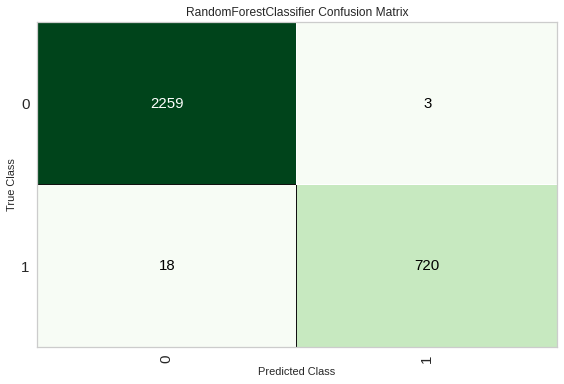

In [11]:
#plot confusion matrix
plot_model(random_forest, plot = 'confusion_matrix')

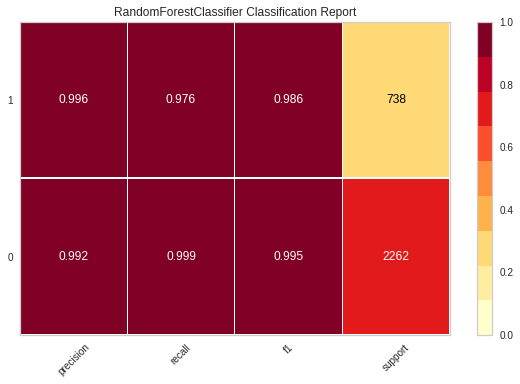

In [13]:
#plot classification report
plot_model(random_forest, plot = 'class_report')

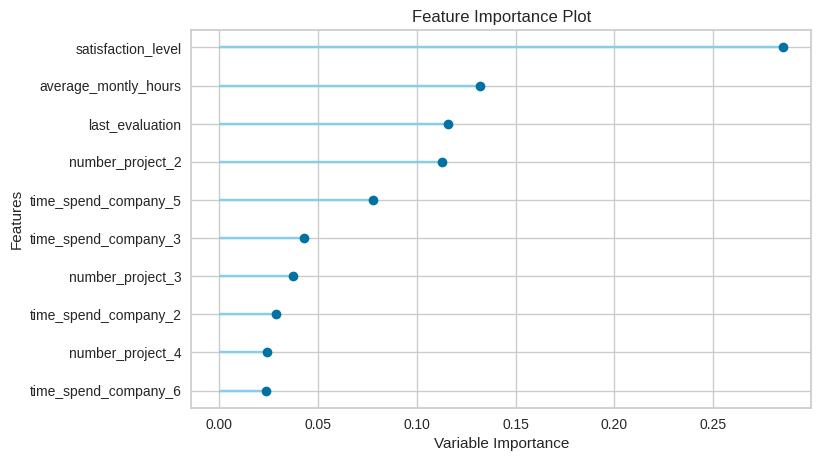

In [12]:
#plot feature importances
plot_model(random_forest, plot='feature')

## Predicting with new data

In [15]:
#predict with new data
new_data = df.copy()
new_data.drop('left', axis = 1, inplace = True)
predict_model(random_forest, data = new_data)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,Label,Score
0,0.38,0.53,2,157,3,0,0,sales,low,1,1.00
1,0.80,0.86,5,262,6,0,0,sales,medium,1,0.99
2,0.11,0.88,7,272,4,0,0,sales,medium,1,1.00
3,0.72,0.87,5,223,5,0,0,sales,low,1,1.00
4,0.37,0.52,2,159,3,0,0,sales,low,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1,1.00
14995,0.37,0.48,2,160,3,0,0,support,low,1,1.00
14996,0.37,0.53,2,143,3,0,0,support,low,1,1.00
14997,0.11,0.96,6,280,4,0,0,support,low,1,1.00


## Saving and loading the model

In [16]:
#save the model]
save_model(random_forest,'random_forest_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='left',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [17]:
#loading the model
load_model('random_forest_pipeline')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='left',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, m